## Project Title: Wine Quality Predictive Model
**Description**: Project performed for personal development of data analysis and predictive modelling skills. The dataset is regarding wine quality. The dataset is thought to be suited to regression and classification.<br>
**Version**: 0.01<br>
**Author**: Tom SC<br>
**Create Date**: 10-Aug-2021<br>
**Input Data**: winequality-red.csv, winequality-white.csv

Resources to read into:<br>
https://albertum.medium.com/nominal-vs-ordinal-classification-1cb97c8993e6
https://www.statisticshowto.com/ordered-logistic-regression/
https://stats.idre.ucla.edu/stata/dae/ordered-logistic-regression/

#### 1. Import key libraries and functions

In [3]:
import pandas as pd, numpy as np, plotly.express as px

#### 2. Read and Explore Data
The .info() method confirms what was stated at the data source of there being no missing values.

In [28]:
df_red = pd.read_csv("winequality-red.csv", sep = ";")
df_white = pd.read_csv("winequality-white.csv", sep = ";")
print(df_red.info())
print(df_white.info())
df_red.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column   

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5  
5      9.4        5  
6      9.4        5  
7     10.0        7  
8      9.5        7  
9     10.5        5

In [45]:
df_red.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [46]:
df_white.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

**These huge tables of statistics can be overwhelming for some. Box plots are brilliant graphical exploratory analysis mechanism so will be used next**

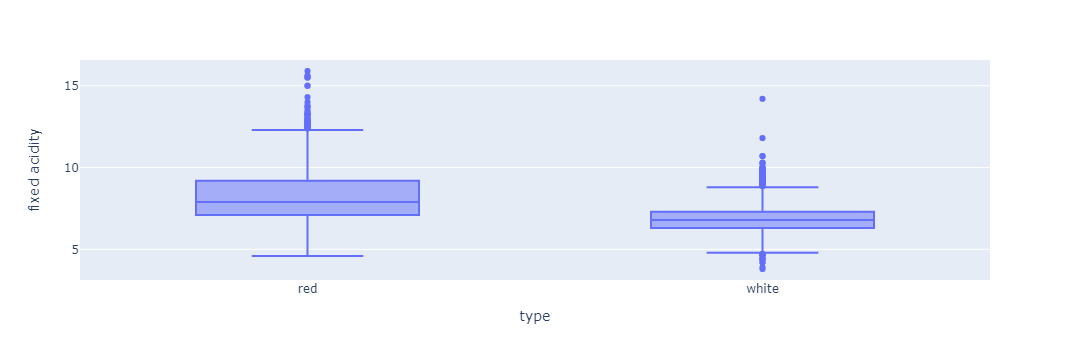

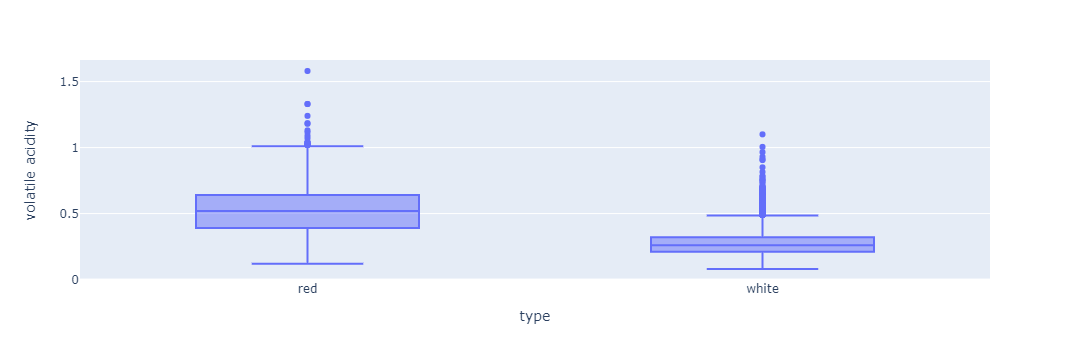

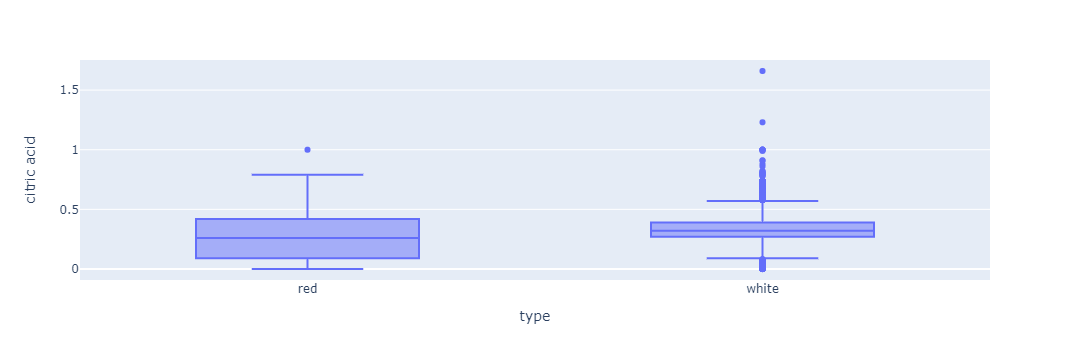

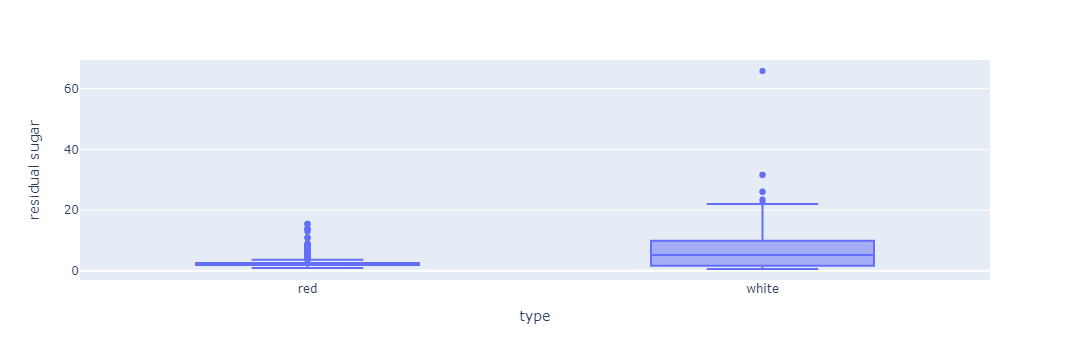

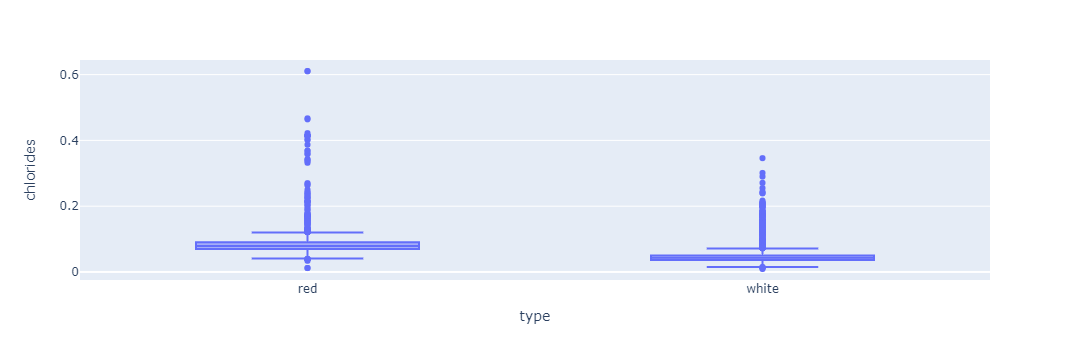

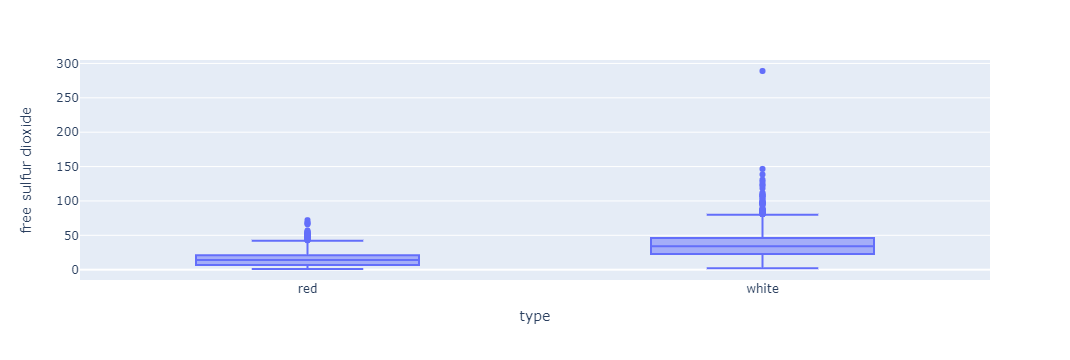

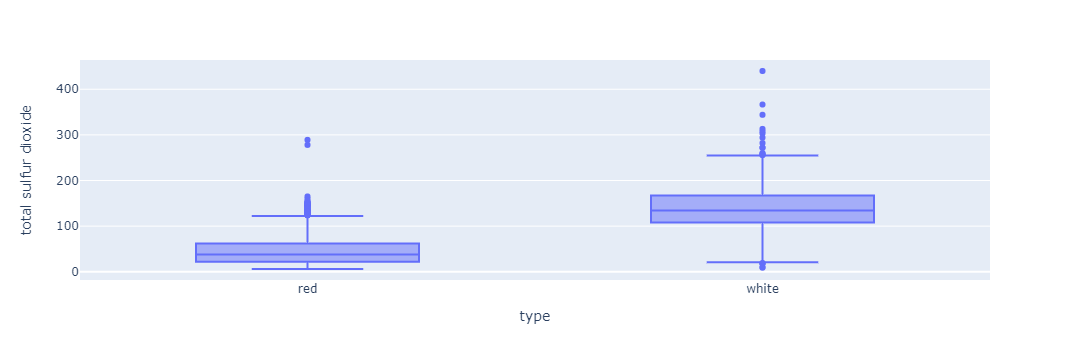

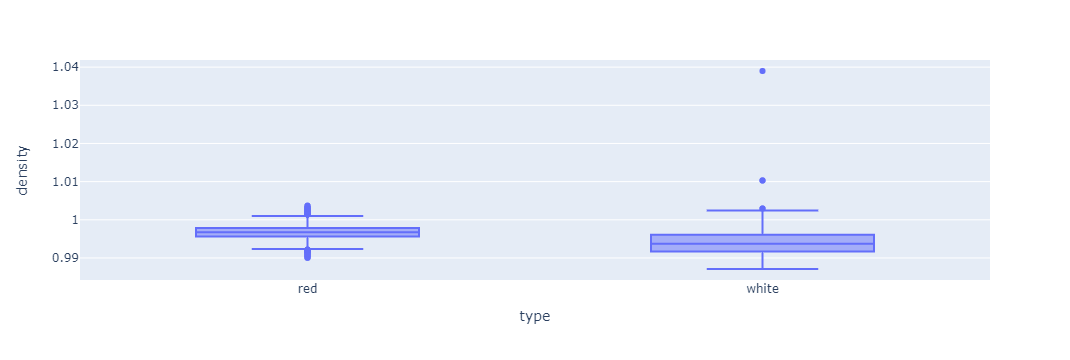

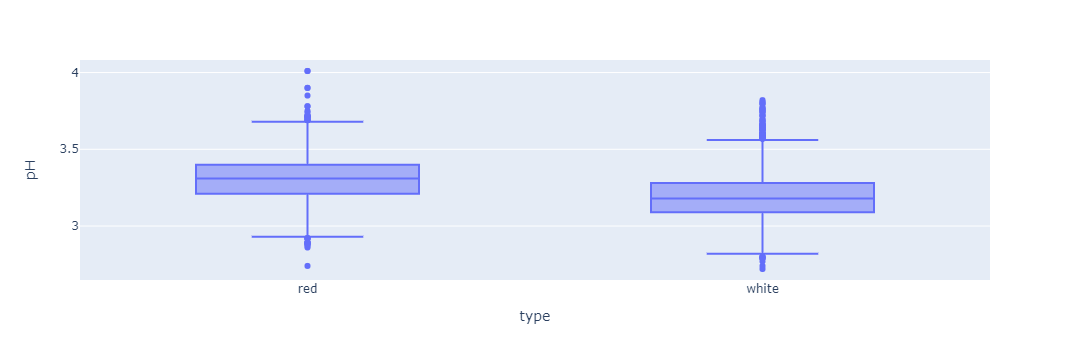

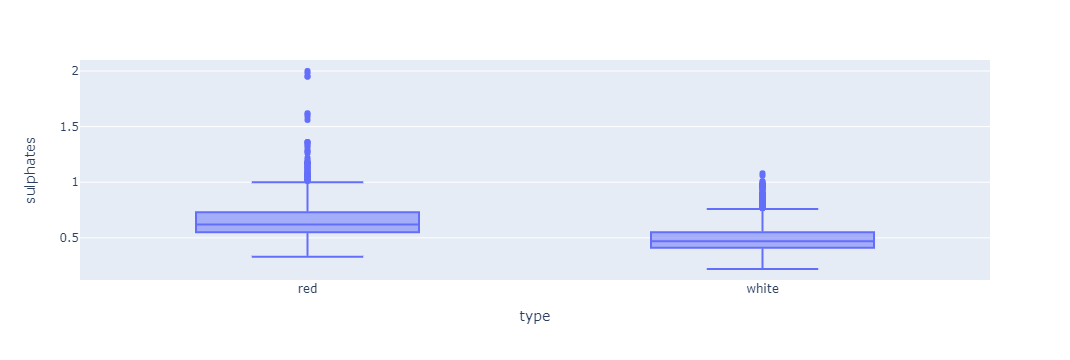

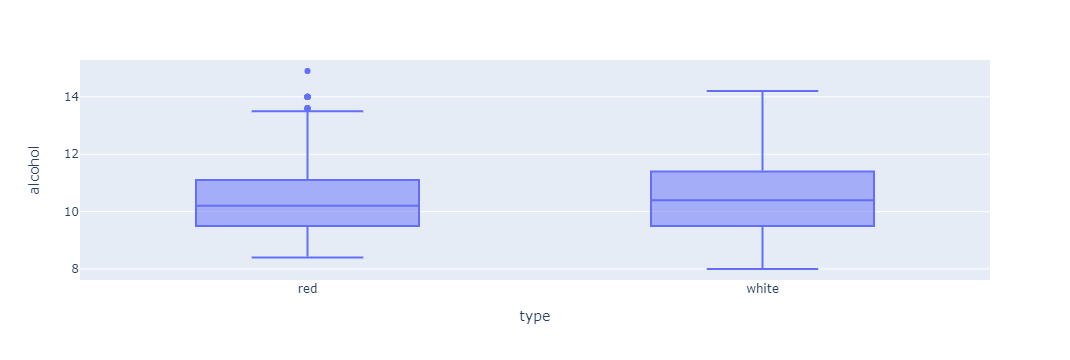

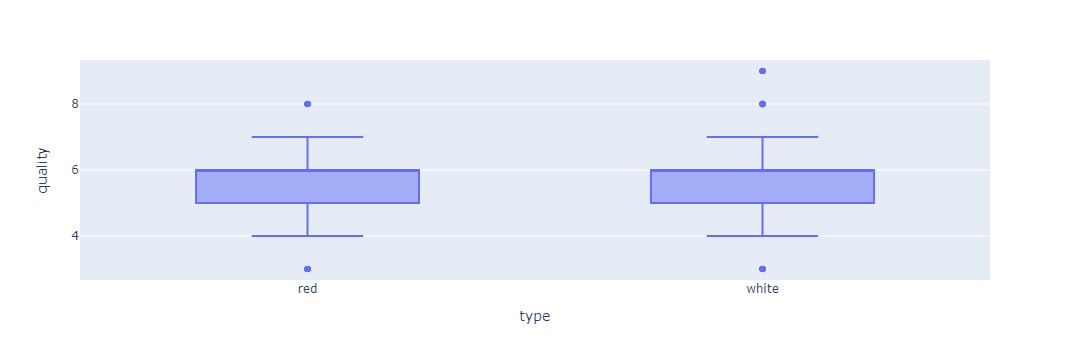

In [54]:
df_red_concat = df_red.copy()
df_red_concat['type'] = 'red'
df_white_concat = df_white.copy()
df_white_concat['type'] = 'white'

df_wines = pd.concat([df_red_concat,df_white_concat]).reset_index(drop=True)
# df_wines.head()
df_wines.describe()

for i in [i for i in df_wines.columns if i != 'type']:
    fig = px.box(df_wines,x='type',y=i)
    fig.show()

**Findings**: If this were to be used for modelling, most of the variables can be considered as continuous variables. The quality is a discrete variable since is is limited to ten values of 1 to 10. This can be considered a ordinal, categorical variable.<br>
Quality is an important variable for the purpose of decision making. One might use it to decide on a wine to submit for a competition or to decide on a pricing mechanism for submitting wholesale bids or setting retail prices. <br>
Quality is interesting so it will be looked into further.

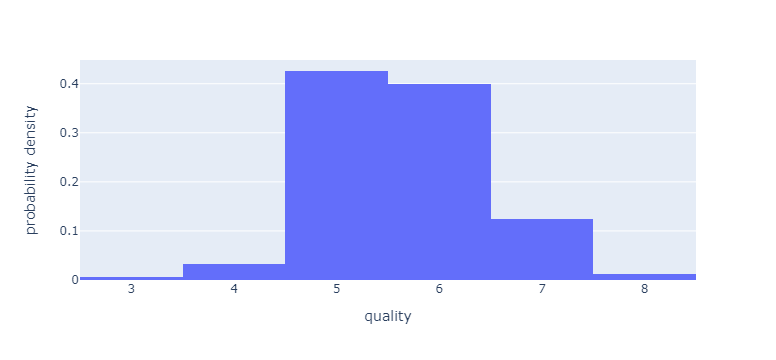

In [29]:
fig = px.histogram(df_red, x="quality",histnorm='probability density')
fig.show()

The probability density histogram shows the red wine quality has the bulk of the scores split almost evenly on a rating of 5 and 6; both account for 83%. Quality 5 is still the mode with 43%<br>
After these two ratings, the next greatest is 7 with 12%.<br>
Ratings 1-2 and 9-10 are not given.<br>
It is not right to say this follows the Normal distribution.

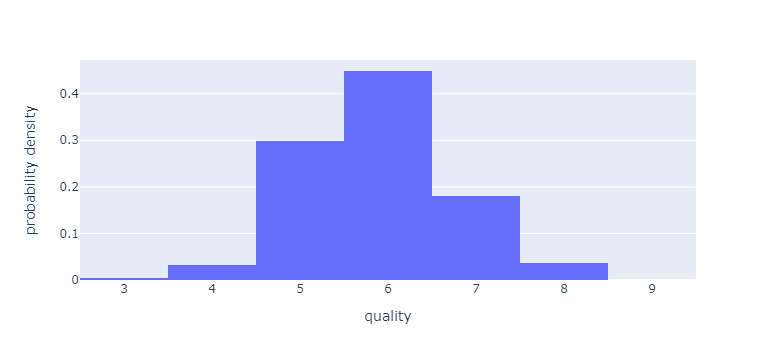

In [25]:
fig = px.histogram(df_white, x="quality",histnorm='probability density')
fig.show()

The probability density histogram shows the white wine quality has the rating of 6 as having the greatest proportion of quality scores at 45%.<br>
The rating of 5 is at 30% and 7 is at 18%.<br>
Ratings 1-2 and 10 are not given.<br>
This is closer to a Normal distribution than the red wine quality ratings.

In [44]:
print("----- RED WINE -----")
print(pd.concat([df_red.quality.value_counts().rename('count'),np.round((df_red.quality.value_counts()/len(df_red)*100),1).rename('percentage')],axis=1).sort_index(),end='\n\n')
print(df_red.quality.describe())
print("----- WHITE WINE -----")
print(pd.concat([df_white.quality.value_counts().rename('count'),np.round((df_white.quality.value_counts()/len(df_white)*100),1).rename('percentage')],axis=1).sort_index(),end='\n\n')
print(df_white.quality.describe())

----- RED WINE -----
   count  percentage
3     10         0.6
4     53         3.3
5    681        42.6
6    638        39.9
7    199        12.4
8     18         1.1

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64
----- WHITE WINE -----
   count  percentage
3     20         0.4
4    163         3.3
5   1457        29.7
6   2198        44.9
7    880        18.0
8    175         3.6
9      5         0.1

count    4898.000000
mean        5.877909
std         0.885639
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64


Although the ratings are numerical, they are discrete rather than continuous. Consequently, a standard OLS regression seems like an unwise choice for a predictive model. Machine learning techniques for forecasting continuous variables also seem unwise. These could still be trialled, however, by forming bands and placing the forecasted results into the bands to determine an accuracy score.<br>
From researching the topic, it appears that the use of an ordered logistic regression such as an ordered logit model is well-suited to this problem.<br>
For ease of exploration, broader categories will be created based on the quality score. These will be low <=4, medium, 5-6, high >= 7.<br>
It could also be done with very low <= 3, low = 4, medium = 5-6, high = 7, very high >= 8. With an ordinal logistic regression, it is considered best to have 5 or fewer categories.